In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [33]:
# load data
data = pd.read_excel('MMM_Blender_data_2.xlsx')

In [34]:
# Remove ($) in column names
data.columns = data.columns.str.replace(' \(\$\)', '', regex=True)

In [35]:
# Display the structure of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        150 non-null    object 
 1   Sales       150 non-null    int64  
 2   TV_ads      150 non-null    float64
 3   online_ads  150 non-null    float64
 4   Print_ads   150 non-null    float64
 5   Price       150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [36]:
# convert the Date Column from object to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%b-%Y')

In [37]:
data.head(10)

,Date,Sales,TV_ads,online_ads,Print_ads,Price
0,2008-01-01,6237000,181222.548442,12152.540107,24986.912760,135.0
1,2008-02-01,6115500,179104.353164,57353.376363,17574.385360,135.0
2,2008-03-01,10577250,222756.223235,146794.245435,16016.022899,135.0
3,2008-04-01,13473000,188266.818315,376459.468169,29689.694160,135.0
4,2008-05-01,6258525,210038.289741,21297.573231,17606.991440,136.5
5,2008-06-01,7371000,196292.677236,80514.079702,20905.296790,136.5
6,2008-07-01,8060325,183358.262369,120537.488441,20116.497418,136.5
7,2008-08-01,10278450,192723.580333,218782.364044,17642.672293,136.5
8,2008-09-01,10991700,200450.916640,248129.090562,18509.452326,138.0
9,2008-10-01,9618600,182675.622775,201009.441600,23807.248992,138.0


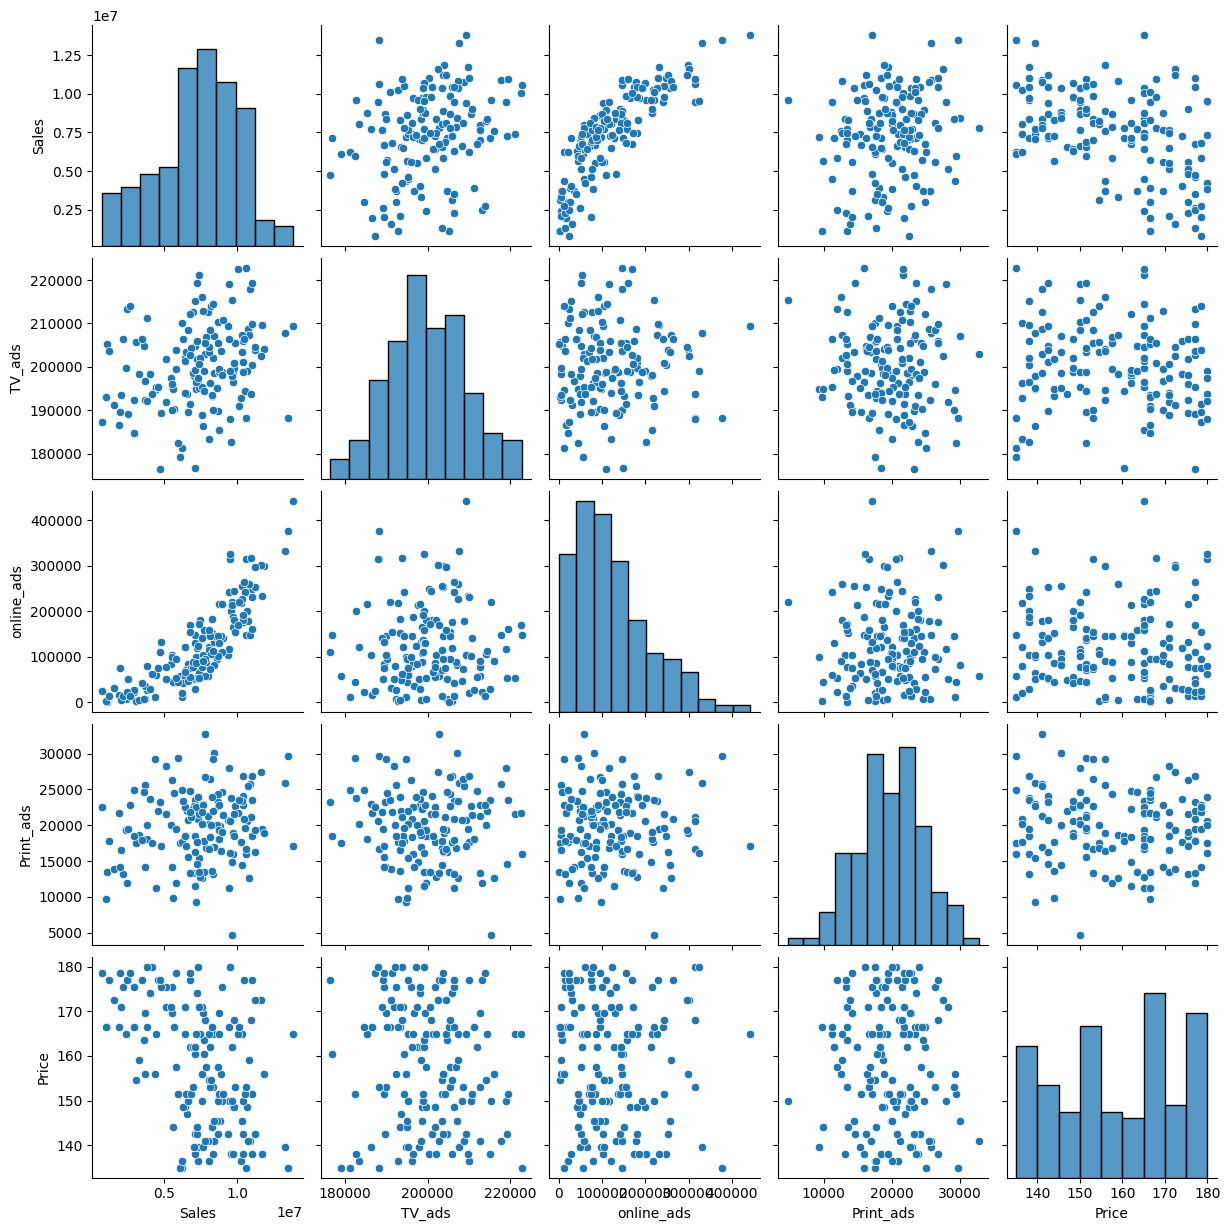

In [38]:
# Pair plot to check for bivariate correlations
sns.pairplot(data)
plt.show()

In [39]:
# Fix skewed online ads by taking the log
data['log_online_ads'] = np.log(data['online_ads'])

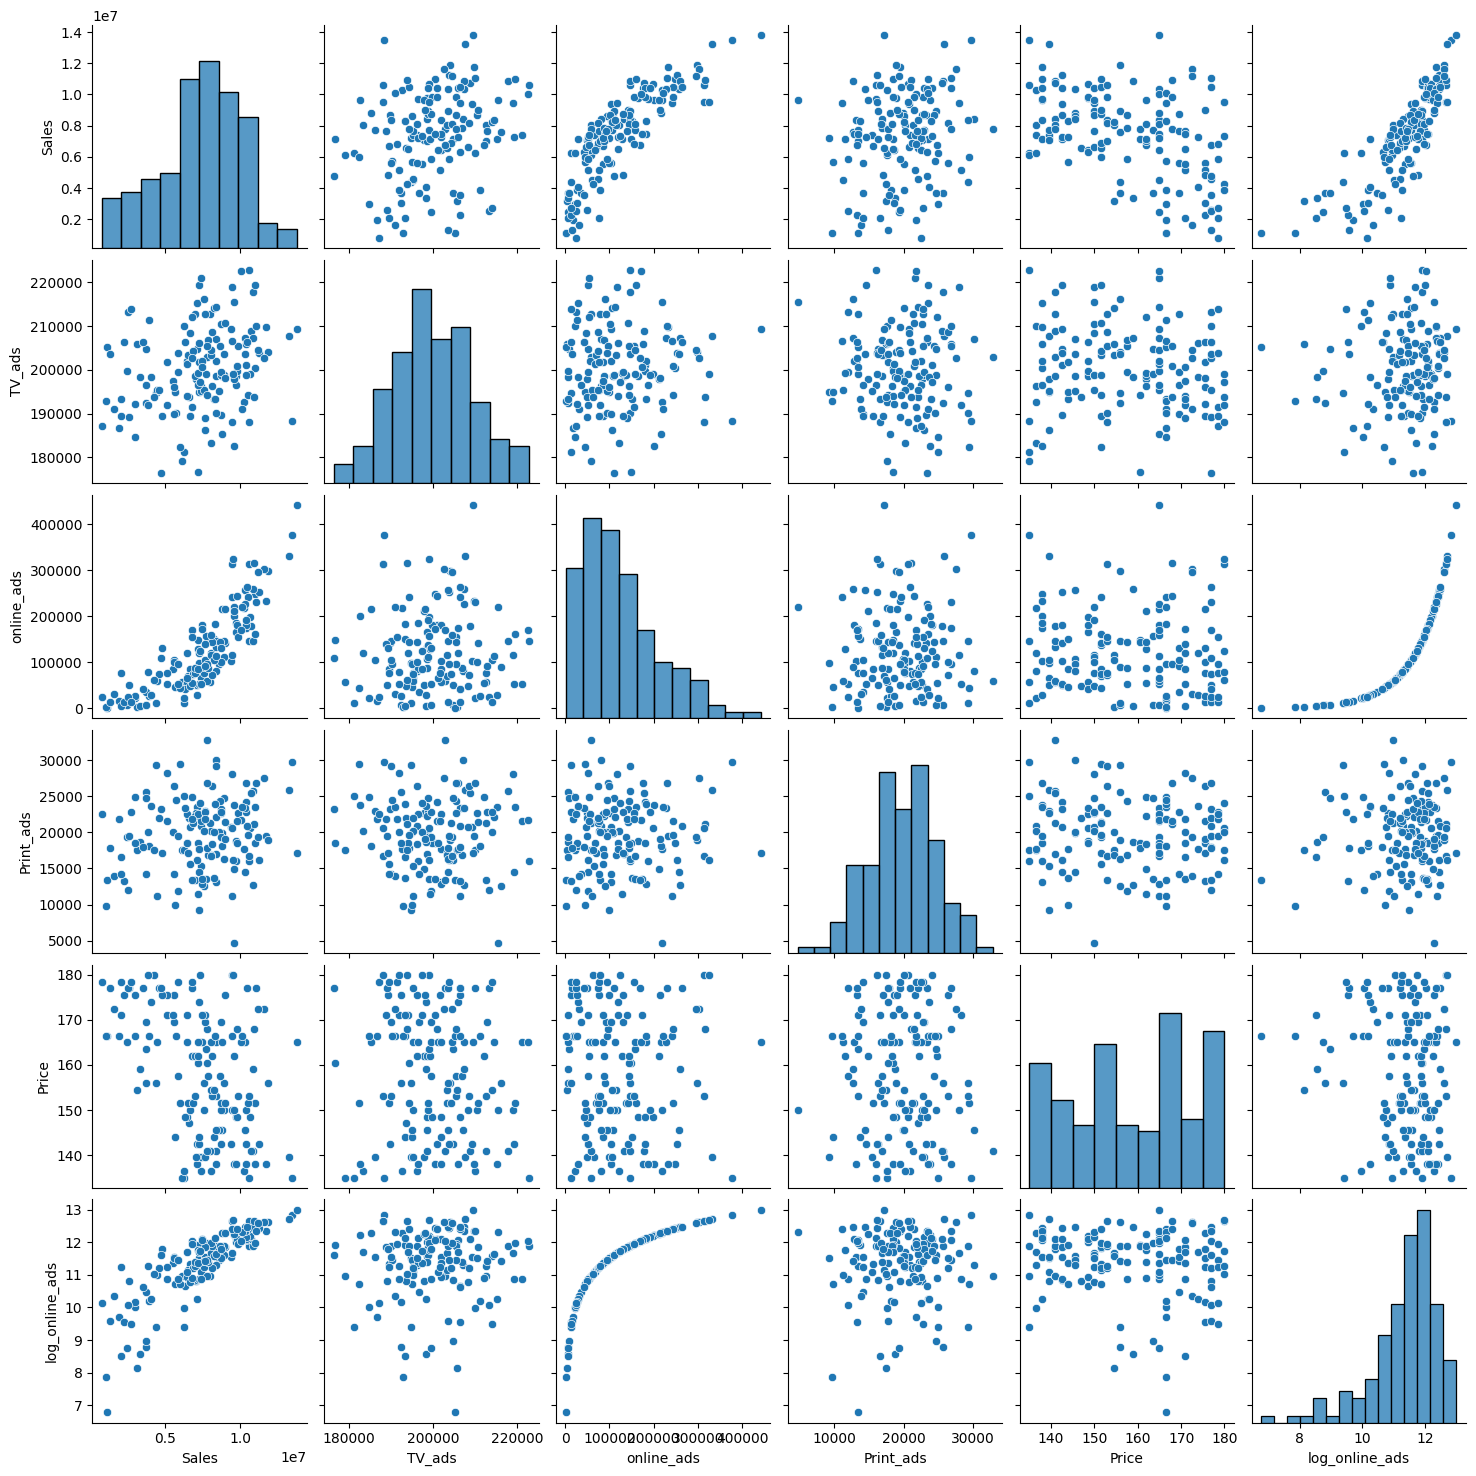

In [40]:
# Replot the pair plot after transformation
sns.pairplot(data)
plt.show()

In [41]:
# Fix skewed online ads by taking the sqrt
data['sqrt_online_ads'] = np.sqrt(data['online_ads'])

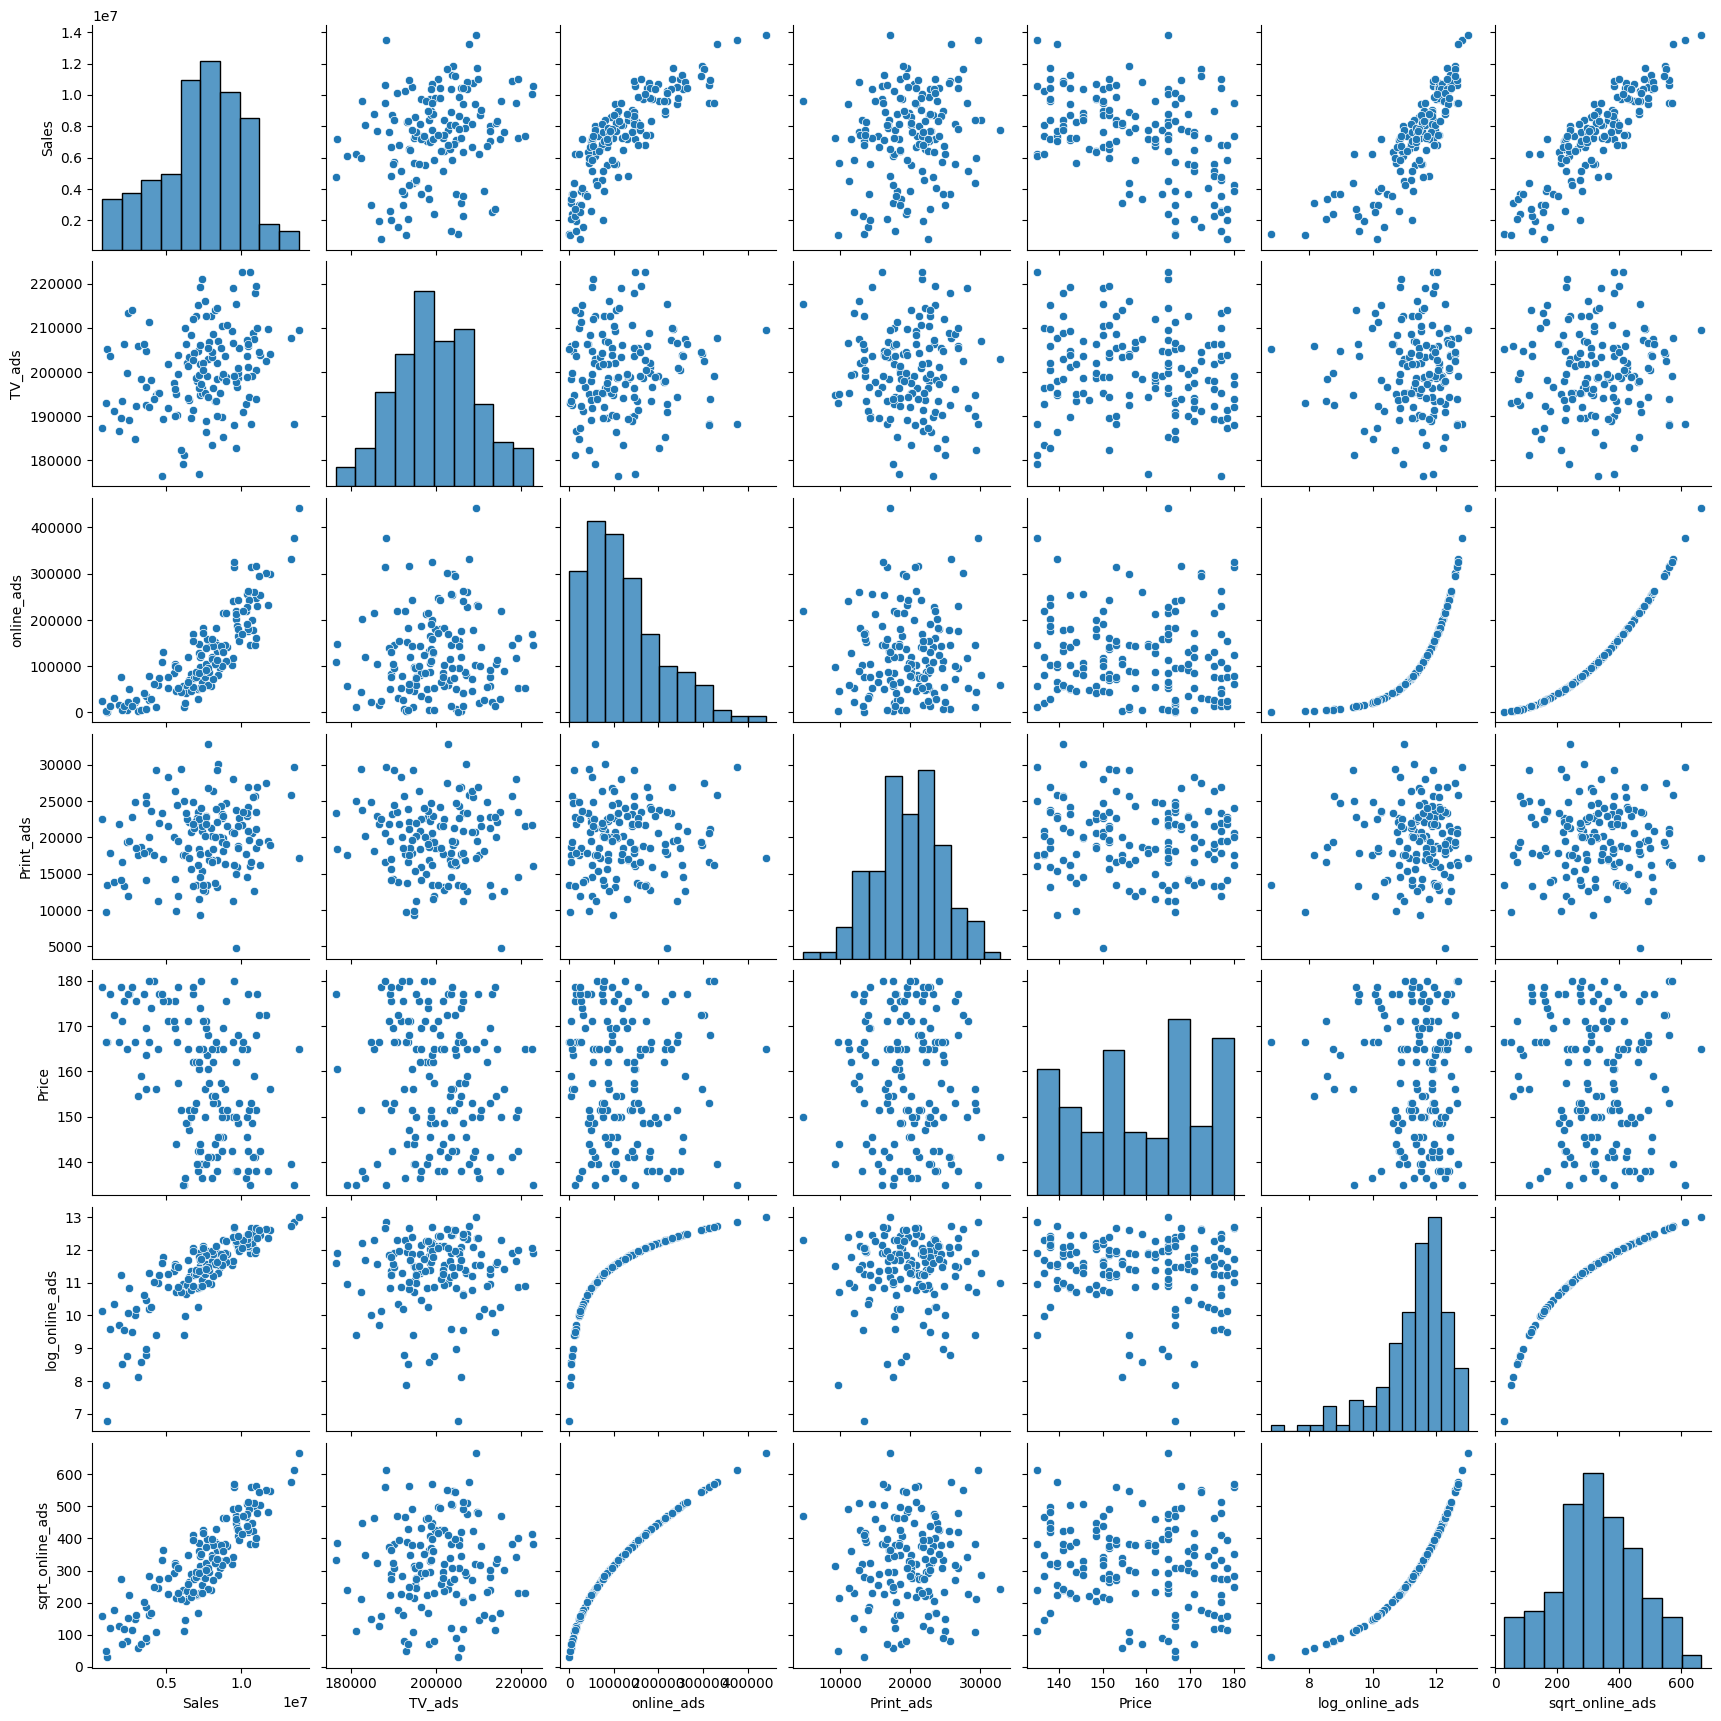

In [42]:
# Replot the pair plot after transformation
sns.pairplot(data)
plt.show()

In [43]:
data = data.drop(columns=["log_online_ads","online_ads"])

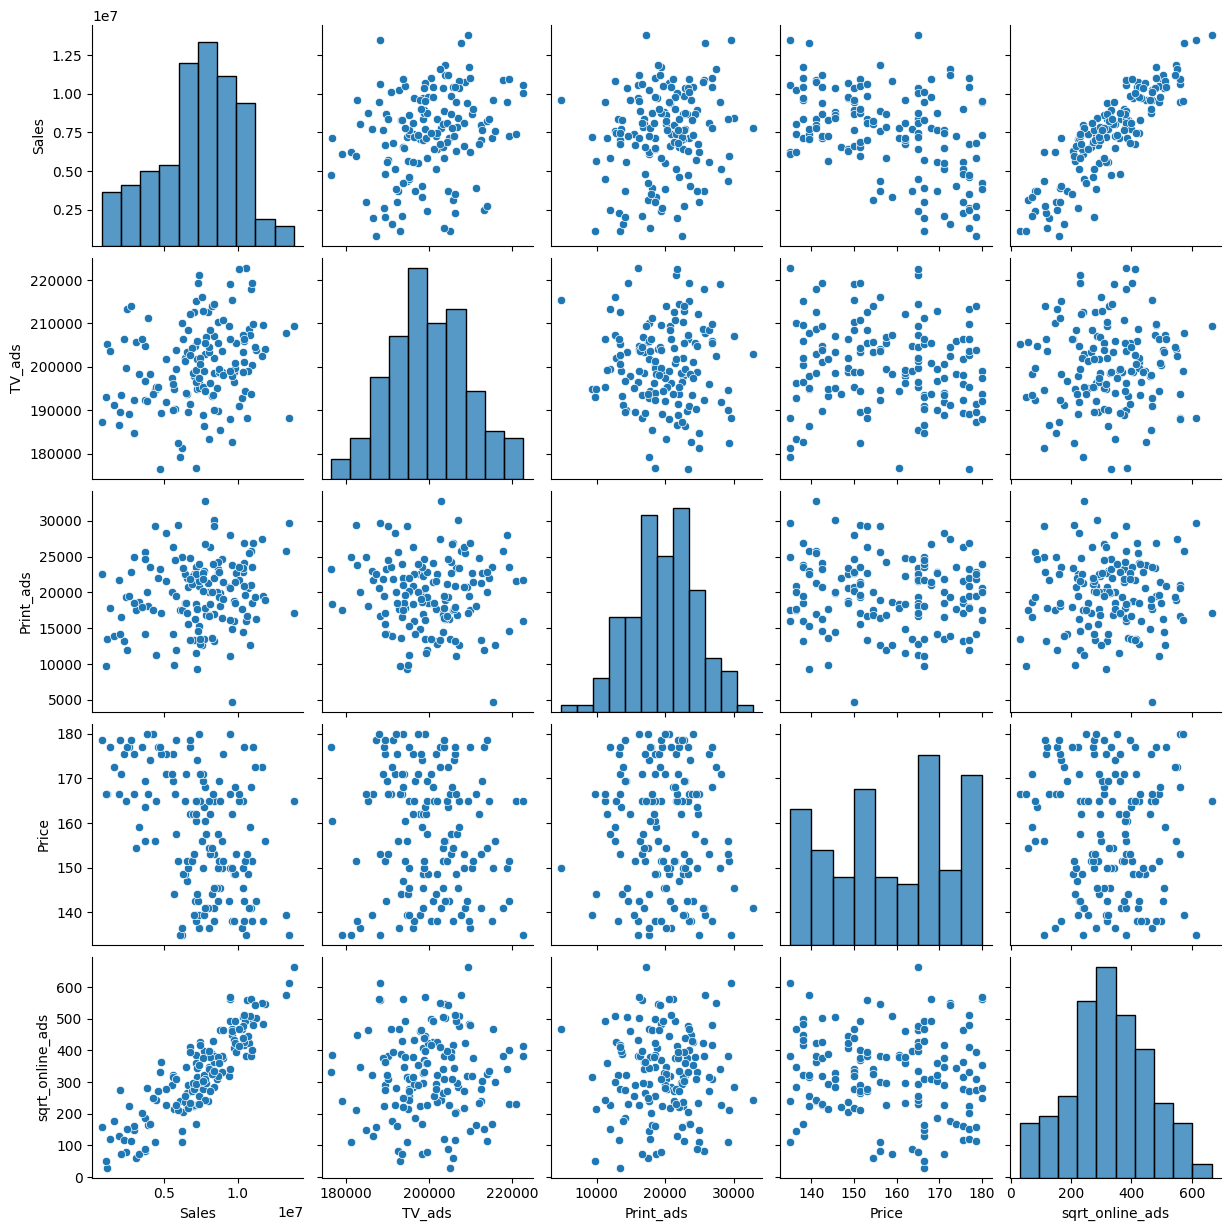

In [44]:
# Show the finalized pairplot
sns.pairplot(data)
plt.show()

In [45]:
# Fitting a model
m1 = smf.ols('Sales ~ TV_ads + Print_ads + Price + sqrt_online_ads', data=data).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     851.8
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.37e-99
Time:                        13:27:47   Log-Likelihood:                -2198.9
No. Observations:                 150   AIC:                             4408.
Df Residuals:                     145   BIC:                             4423.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.284e+06   1.22e+06     

In [46]:
# # Feature Engineering: Time-based features
# # Extracting seasonal features
# data['Month'] = data['Date'].dt.month
# data['Week_of_Year'] = data['Date'].dt.isocalendar().week
# data['Day_of_Week'] = data['Date'].dt.dayofweek

# # Creating trend variables
# data['Time_Index'] = range(1, len(data) + 1)
# data['Trend_Linear'] = data['Time_Index']
# data['Trend_Quadratic'] = data['Time_Index'] ** 2

# # Creating lagged variables for marketing activities
# lag_features = ['TV_ads', 'sqrt_online_ads', 'Print_ads']
# for feature in lag_features:
#     data[f'{feature}_lag_1'] = data[feature].shift(1)
#     data[f'{feature}_lag_2'] = data[feature].shift(2)
#     data[f'{feature}_lag_3'] = data[feature].shift(3)

# # Calculating rolling means
# for feature in lag_features:
#     data[f'{feature}_rolling_mean_3'] = data[feature].rolling(window=3).mean()
#     data[f'{feature}_rolling_mean_6'] = data[feature].rolling(window=6).mean()

# # Drop the initial rows with NaN values caused by lagging
# data = data.dropna().reset_index(drop=True)

In [47]:
# # Correlation matrix and plot using seaborn's heatmap
# plt.figure(figsize=(12, 8))  # Adjust the size to fit your data
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=.5)

In [48]:
# Test with Linear Regression

In [49]:
X1 = data.drop(columns=['Sales','Date']).values
y1 = data['Sales'].values

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,y1,train_size=0.8,random_state=42)

In [ ]:
# Train our model and assess it against training data
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Model: Linear Regression
lr = LinearRegression().fit(X1_train, y1_train)
# Machine Learning Model: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X1_train, y1_train)

In [ ]:
# Performance of Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt

print("R^2:",lr.score(X1_train,y1_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y1_train,lr.predict(X1_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y1_train,lr.predict(X1_train)))

R^2: 0.9614650912609615
Root Mean Squared Error: 542111.6121119392
Mean Absolute Error: 444237.17206539825


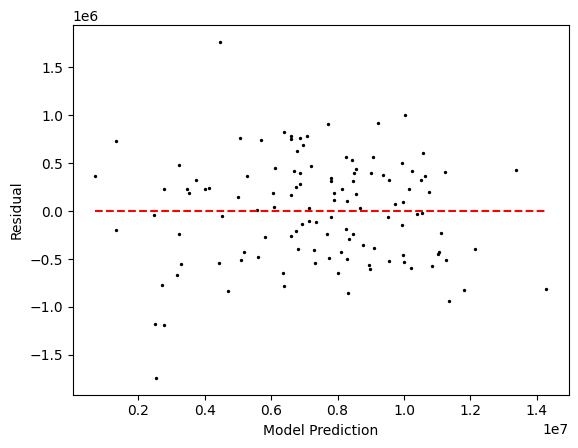

In [ ]:
#Residuals calculated by definition above.
predicted_y1 = lr.predict(X1_train)
#Note we can perform element-wise subtraction between arrays like so
residuals1 = y1_train - predicted_y1

import matplotlib.pyplot as plt
plt.scatter(predicted_y1,residuals1,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y1),max(predicted_y1),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

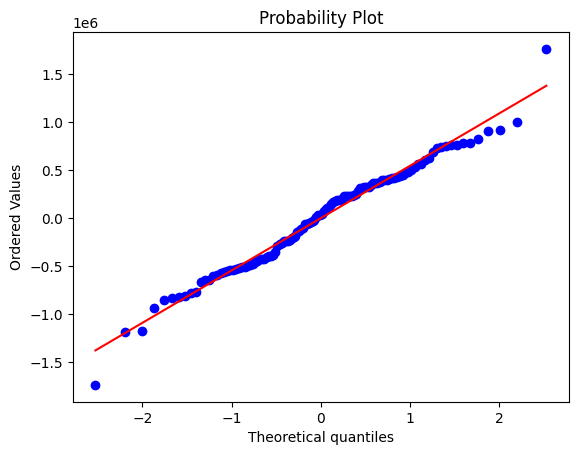

In [ ]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals1,dist='norm',plot=ax)
plt.show()

In [ ]:
# Performance of Random Forest
print("R^2:",rf.score(X1_train,y1_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y1_train,rf.predict(X1_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y1_train,rf.predict(X1_train)))

R^2: 0.9872102371796767
Root Mean Squared Error: 312314.96031161945
Mean Absolute Error: 248654.96875


In [ ]:
# Calculate the elasticity for each variable in the linear model
coefficients = m1.params
mean_values = X1_train.mean()

# Elasticity = coefficient * (mean value of X / mean value of Y)
elasticities = coefficients * (mean_values / y1_train.mean())

# Display the elasticities
elasticities


Intercept         -9561.339484
TV_ads                0.448691
Print_ads             0.644959
Price              -511.491988
sqrt_online_ads     131.678389
dtype: float64

In [ ]:
# feature_importances = rf.feature_importances_
# feature_importances

Interpretation:
Price Elasticity (-511.49): For every 1% increase in price, sales decrease by approximately 511.49%. This indicates that sales are quite sensitive to price changes, with higher prices leading to a significant drop in sales.

Online Ads Elasticity (131.68): For every 1% increase in the sqrt of Online Ads Spend, sales increase by approximately 131.68%. This indicates that sales are quite sensitive to price changes, with higher prices leading to a significant increase in sales.

Print Ads Elasticity (0.64): Increasing spending on print ads leads to a increase in sales, which suggests that print advertising might not be as effective as expected.

TV Ads Elasticity (0.45): Increasing spending on TV ads leads to a increase in sales, which suggests that TV advertising might not be as effective as expected.